# Домашнее задание по интервалам оценок в Python

Всего четрые задачи: две простых и две непростых. В последней необходимо проделать небольшую теоретическую работу.

## Справка по теории к задачам по доверительным интервалам

### 1. Основные понятия доверительных интервалов
Доверительный интервал (CI) – это диапазон значений, который, с определенной вероятностью, содержит истинное значение параметра распределения.

**Формула для нормального доверительного интервала:**
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot SE(\hat{\theta})
\end{equation}
где $\hat{\theta}$ – точечная оценка параметра, $SE(\hat{\theta})$ – стандартная ошибка, а $z_{\alpha/2}$ – квантиль нормального распределения.

### 2. Методы построения доверительных интервалов
#### 2.1. Классический метод на основе информации Фишера
Если оценка параметра $\hat{\theta}$ асимптотически нормально распределена, доверительный интервал определяется через стандартную ошибку:
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot \frac{1}{\sqrt{I(\hat{\theta})}}
\end{equation}
где $I(\hat{\theta})$ – информация Фишера.

#### 2.2. Метод бутстрапа
Метод бутстрапа используется, когда стандартные предположения о распределении параметра нарушены. Основные шаги:
1. Генерируются бутстрап-выборки из исходных данных.
2. Для каждой выборки вычисляется оценка параметра.
3. Определяются квантильные границы интервала.

#### 2.3. Байесовские доверительные интервалы
В Байесовском подходе параметры моделируются как случайные величины. Доверительный интервал строится как область высокой плотности (HPDI - Highest Posterior Density Interval):
\begin{equation}
P(\theta_L \leq \theta \leq \theta_U | X) = 1 - \alpha.
\end{equation}

**Как вычислить HPDI**

Пусть у нас есть выборка $\mathbf{X}=(X_1,X_2,...,X_n)$ и соответствующая ей апостериорная плотность вероятности $f(\theta|\pi)$. Тогда HPDI с уровнем доверия $\alpha$ определяется как множество значений $\theta$, таких что:

$$ \text{HPDI}_{\alpha} = \{\theta : \pi(\theta | \mathbf{X}) > k\}$$

где $k$ выбирается таким образом, чтобы суммарная вероятность всех точек внутри этого множества была равна $\alpha$.

Другими словами, мы ищем такие значения $\theta$, для которых плотность вероятности больше некоторого порога $k$. Этот порог $k$ находится так, чтобы сумма вероятностей этих значений составляла заданный уровень доверия $\alpha$.
Алгоритм нахождения HPDI:

1. Сортировка: Отсортируйте все значения $\theta$ по убыванию плотности вероятности $f(\theta|\pi)$.
2. Итерации: Начните с первого элемента отсортированного списка и суммируйте вероятности до тех пор, пока их сумма не превысит $\alpha$. Все элементы, включенные в эту сумму, будут составлять HPDI.
3. Если сумма вероятностей не достигает $\alpha$, продолжайте добавлять следующие элементы из списка, пока не достигнете нужного уровня доверия.

Этот метод позволяет получить наиболее плотное распределение вероятностей, соответствующее уровню доверия $\alpha$.

### 3. Применение доверительных интервалов
В домашней работе предлагается рассмотреть следующие:
1. Построение классического доверительного интервала для параметра нормального распределения.
2. Использование бутстрапа для оценки устойчивости оценок.
3. Оценка параметра экспоненциального распределения методом максимального правдоподобия и построение доверительного интервала.
4. Байесовский анализ параметра распределения и сравнение различных методов построения доверительных интервалов.

Каждый метод имеет свои преимущества и недостатки. Выбор подходящего метода зависит от свойств данных, размера выборки и предположений о распределении параметра.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Задача 1 ($\Sigma$ = 13б)
Неходимо построить доверительные интервалы для среднего нормального распределения:
1. (4б) Сгенерировать выборку из нормального распределения
2. (5б) Вычислить доверительный интервал для среднего
3. (4б) Визуализировать результаты

### --- Этап 1: Генерация выборки из нормального распределения ---

In [ ]:
np.random.seed(0)

n = 100     # размер выборки
mu = 10     # истинное среднее
sigma = 2   # стандартное отклонение
sample = np.random.normal(mu, sigma, n)

### --- Этап 2: Вычисление доверительного интервала для среднего ---

In [ ]:
confidence = 0.95                                     # уровень доверия (95%)
sample_mean = np.mean(sample)                         # среднее значение выборки
sample_std = np.std(sample, ddof=1)                   # несмещенная стандартная ошибка выборки (ddof=1)
alpha = 1 - confidence                                # альфа — уровень значимости
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)         # квантиль распределения Стьюдента для заданного уровня доверия
margin_error = t_critical * sample_std / np.sqrt(n)   # погрешность (длина половины доверительного интервала)
ci_lower = sample_mean - margin_error                 # нижняя граница доверительного интервала
ci_upper = sample_mean + margin_error                 # верхняя граница доверительного интервала

ci_lower, ci_upper

(np.float64(9.717629641993193), np.float64(10.521602420144747))

### --- Этап 3: Визуализация результатов ---

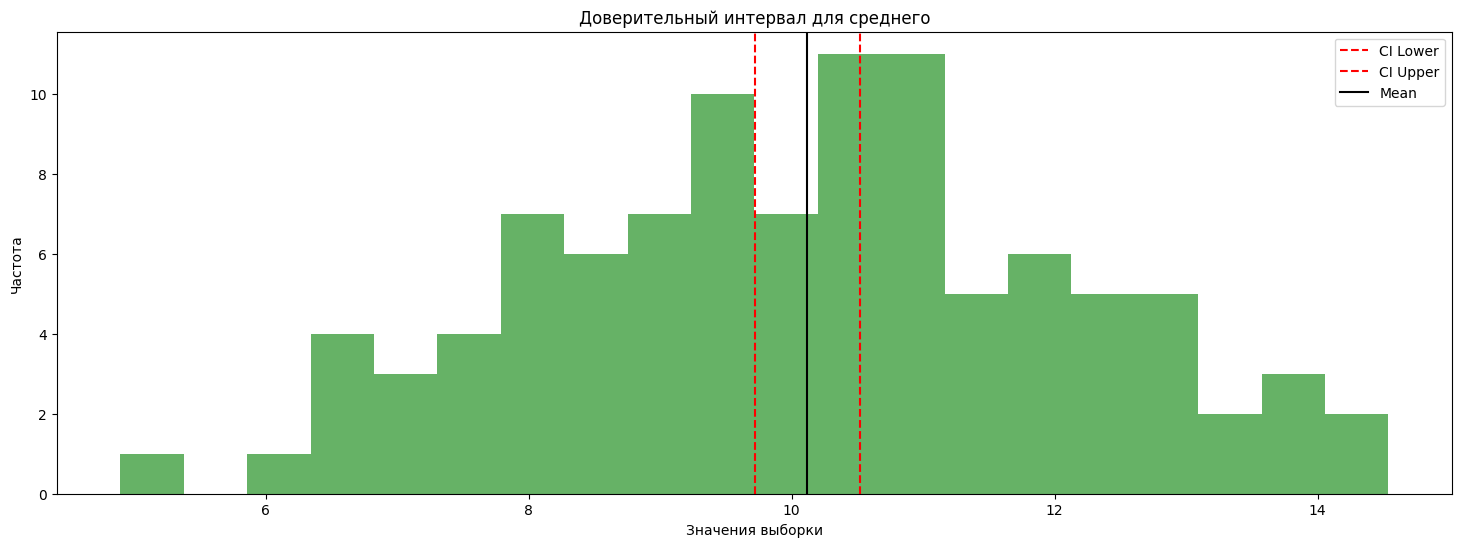

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(sample, bins=20, alpha=0.6, color='green')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=1.5, label=f'CI Lower')
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=1.5, label=f'CI Upper')
plt.axvline(sample_mean, color='black', linewidth=1.5, label=f'Mean')
plt.title('Доверительный интервал для среднего')
plt.xlabel('Значения выборки')
plt.ylabel('Частота')
plt.legend()

plt.show()

## Задача 2 ($\Sigma$ = 11б)
Используйте бутстрап-методы для анализа устойчивости доверительных интервалов
1. (2б) Добавьте в выборку из предыдущей задачи выбросы
2. (5б) Рассчитать доверительный интервал классическим способом и бутстрап-методом
3. (4б) Сравнить устойчивость интервалов

### --- Этап 1: Генерация выборки и добавление выбросов ---

In [ ]:
outliers = np.array([20, 0])
sample_with_outliers = np.concatenate([sample, outliers])

### --- Этап 2: Расчет доверительных интервалов классическим способом и бутстрап-методом ---

In [ ]:
# классический способ
confidence = 0.95                                     # уровень доверия (95%)
sample_mean = np.mean(sample_with_outliers)                         # среднее значение выборки
sample_std = np.std(sample_with_outliers, ddof=1)                   # несмещенная стандартная ошибка выборки (ddof=1)
alpha = 1 - confidence                                # альфа — уровень значимости
t_critical = stats.t.ppf(1 - alpha/2, df=len(sample_with_outliers)-1)         # квантиль распределения Стьюдента для заданного уровня доверия
margin_error = t_critical * sample_std / np.sqrt(len(sample_with_outliers))   # погрешность (длина половины доверительного интервала)
ci_lower_classic = sample_mean - margin_error                 # нижняя граница доверительного интервала
ci_upper_classic = sample_mean + margin_error                 # верхняя граница доверительного интервала

ci_lower_classic, ci_upper_classic

(np.float64(9.636002807560583), np.float64(10.598538429829556))

In [ ]:
# бутстрап-метод

n_boot = 1000      # число бутстрап-выборок
boot_means = np.empty(n_boot)
n_total = len(sample_with_outliers)

for i in range(n_boot):
    boot_sample = np.random.choice(sample_with_outliers, size=n_total, replace=True)
    boot_means[i] = np.mean(boot_sample)

ci_lower_bootstrap = np.percentile(boot_means, 100*alpha/2)
ci_upper_bootstrap = np.percentile(boot_means, 100*(1 - alpha/2))

ci_lower_bootstrap, ci_upper_bootstrap

(np.float64(9.686352134446265), np.float64(10.580861201026158))

### --- Этап 3: Сравнение устойчивости интервалов ---

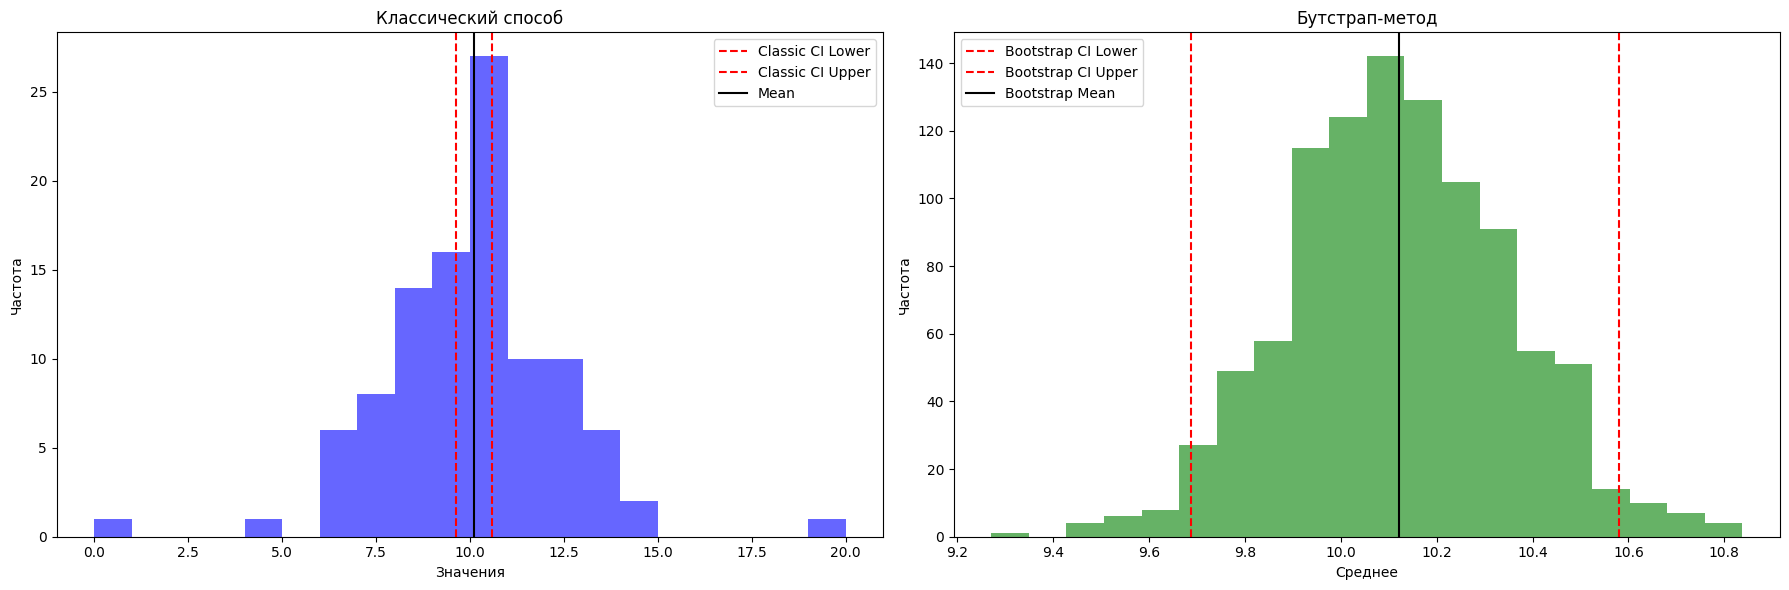

In [ ]:
plt.figure(figsize=(18, 6))

# Гистограмма Классический способ
plt.subplot(1, 2, 1)
plt.hist(sample_with_outliers, bins=20, alpha=0.6, color='blue')
plt.axvline(ci_lower_classic, color='red', linestyle='dashed', linewidth=1.5, label=f'Classic CI Lower')
plt.axvline(ci_upper_classic, color='red', linestyle='dashed', linewidth=1.5, label=f'Classic CI Upper')
plt.axvline(sample_mean, color='black', linewidth=1.5, label=f'Mean')
plt.title('Классический способ')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()

# Гистограмма Бутстрап-метод
plt.subplot(1, 2, 2)
plt.hist(boot_means, bins=20, alpha=0.6, color='green')
plt.axvline(ci_lower_bootstrap, color='red', linestyle='dashed', linewidth=1.5, label=f'Bootstrap CI Lower')
plt.axvline(ci_upper_bootstrap, color='red', linestyle='dashed', linewidth=1.5, label=f'Bootstrap CI Upper')
plt.axvline(np.mean(boot_means), color='black', linewidth=1.5, label=f'Bootstrap Mean')
plt.title('Бутстрап-метод')
plt.xlabel('Среднее')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()

plt.show()

## Задача 3 ($\Sigma$ = 18б)
Метод максимального правдоподобия и доверительные интервалы
1. (5б) Постройте оценку параметра экспоненциального распределения методом максимального правдоподобия (ММП)
2. (6б) Постройте доверительный интервал для оценки параметра из предыдущего пункта
3. (7б) Сравнените доверительные интервалы: классический через ММП, бутстрап

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [ ]:
# Генерация выборки
np.random.seed(0)

n = 100                 # размер выборки
true_lambda = 0.5       # истинное значение λ для экспоненциального распределения
scale = 1 / true_lambda # параметр scale для np.random.exponential (обратный λ)
data = np.random.exponential(scale=scale, size=n) # генерация выборки из экспоненциального распределения

### --- Этап 1: Оценка параметра методом максимального правдоподобия ---

In [ ]:
est_lambda = 1 / np.mean(data)
est_lambda

np.float64(0.5442778682726738)

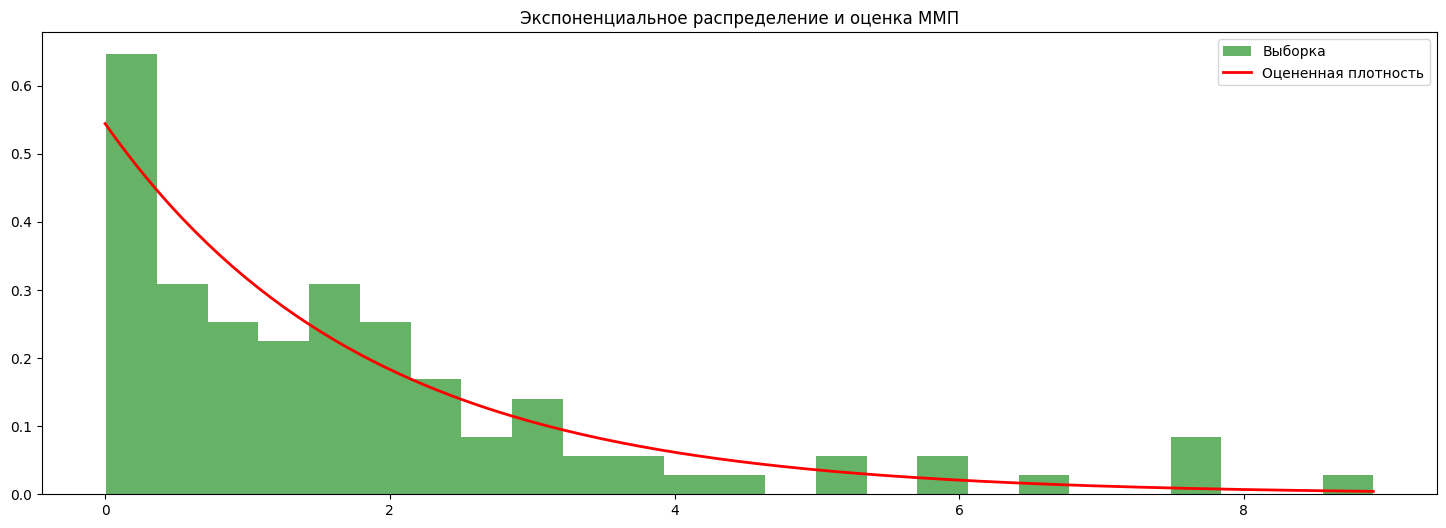

In [ ]:
x = np.linspace(0, np.max(data), 200)
est_pdf = est_lambda * np.exp(-est_lambda * x)

plt.figure(figsize=(18,6))
plt.hist(data, density=True, alpha=0.6, color='green', bins=25, label='Выборка' )
plt.plot(x, est_pdf, 'r', linewidth=2, label='Оцененная плотность')
plt.title('Экспоненциальное распределение и оценка ММП')
plt.legend()

plt.show()

### --- Этап 2: Построение доверительного интервала ---

In [ ]:
alpha = 0.05
chi2_lower = stats.chi2.ppf(alpha / 2, 2 * n)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, 2 * n)
sum_data = np.sum(data)
ci_classical_lower = chi2_lower / (2 * sum_data)
ci_classical_upper = chi2_upper / (2 * sum_data)
ci_classical_lower, ci_classical_upper

(np.float64(0.4428461971220892), np.float64(0.6560123874823592))

### --- Этап 3: Сравнение разных методов построения доверительных интервалов ---

In [ ]:
n_bootstrap = 1000
bootstrap_estimates = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    bootstrap_sample = resample(data, n_samples=n, random_state=i)
    bootstrap_estimates[i] = 1 / np.mean(bootstrap_sample)

# Доверительный интервал на основе эмпирических перцентилей бутстрап-распределения
ci_bootstrap_lower = np.percentile(bootstrap_estimates, 2.5)
ci_bootstrap_upper = np.percentile(bootstrap_estimates, 97.5)
ci_bootstrap_lower, ci_bootstrap_upper

(np.float64(0.4461519017129239), np.float64(0.6686776896333757))

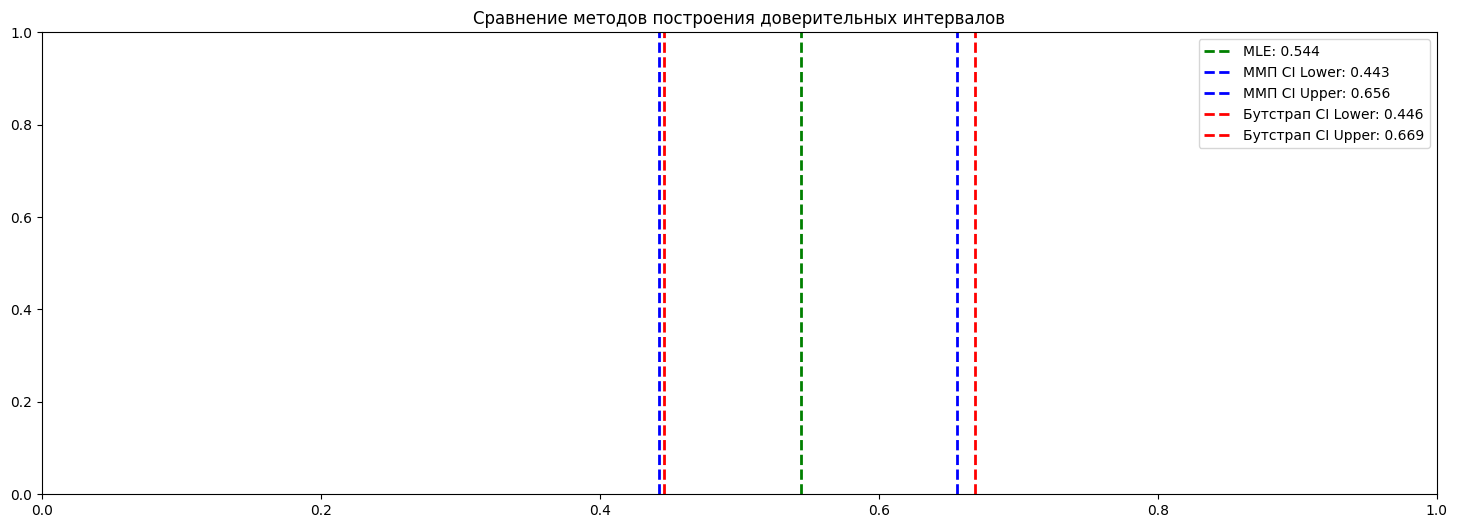

In [ ]:
plt.figure(figsize=(18, 6))
plt.axvline(est_lambda, color='green', linestyle='dashed', linewidth=2, label=f'MLE: {est_lambda:.3f}')
plt.axvline(ci_classical_lower, color='blue', linestyle='dashed', linewidth=2, label=f'ММП CI Lower: {ci_classical_lower:.3f}')
plt.axvline(ci_classical_upper, color='blue', linestyle='dashed', linewidth=2, label=f'ММП CI Upper: {ci_classical_upper:.3f}')
plt.axvline(ci_bootstrap_lower, color='red', linestyle='dashed', linewidth=2, label=f'Бутстрап CI Lower: {ci_bootstrap_lower:.3f}')
plt.axvline(ci_bootstrap_upper, color='red', linestyle='dashed', linewidth=2, label=f'Бутстрап CI Upper: {ci_bootstrap_upper:.3f}')
plt.title('Сравнение методов построения доверительных интервалов')
plt.legend()

plt.show()

## Задача 4 ($\Sigma$ = 58б)
Доверительные интервалы и сравнение методов оценивания

Необходимо исследовать надежность доверительных интервалов при различных методах оценивания параметров

### Теоретическая часть: ($\Sigma$ = 12б)
(_ответ нужно выполнить на бумаге и прикрепить отдельным файлом PDF_)

Рассматривается случайная выборка $X_1, X_2, ..., X_n$ из экспоненциального распределения с параметром $\theta$. Предлагается использовать три метода оценивания параметра $\theta$:
   - **Метод моментов** (MM)
   - **Метод максимального правдоподобия** (MLE)
   - **Байесовский метод** (Bayesian)

Для каждого метода необходимо:
1. (4б) Найти точечную оценку параметра $\theta$.
2. (4б) Вывести формулы доверительных интервалов для $\theta$.
3. (4б) Сравнить свойства интервалов: ширина, устойчивость, покрытие.

### Практическая часть: ($\Sigma$ = 46б)

1. **Генерация данных:** (4б) Сгенерировать выборку из гамма-распределение с параметрами $\alpha, \beta$).

2. **Оценка параметров:** ($\Sigma$ = 18б)
   - (12б) Найти оценки $\theta$ методами MM, MLE и Bayesian.
   - (6б) Построить доверительные интервалы.

3. **Анализ и визуализация:** ($\Sigma$ = 12б)
   - (6б) Сравнить ширину доверительных интервалов.
   - (6б) Построить графики распределений оценок параметра.

4. **Выводы:** ($\Sigma$ = 12б)
   - (6б) Какой метод дает наиболее узкий интервал?
   - (6б) Как методы реагируют на небольшие изменения в данных?

## Практическая часть

In [92]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

### --- Этап 1: Генерация данных ---

In [93]:
np.random.seed(42)
alpha_true = 3    # форма
beta_true  = 2    # масштаб
n = 1000          # размер выборки

data = np.random.gamma(shape=alpha_true, scale=beta_true, size=n)

### --- Этап 2: Метод моментов ---

In [94]:
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1)

alpha_mm = sample_mean**2 / sample_var
beta_mm = sample_var / sample_mean

print(f"MM-оценка: alpha = {alpha_mm:.3f}, beta = {beta_mm:.3f}")

MM-оценка: alpha = 3.213, beta = 1.916


### --- Этап 3: Метод максимального правдоподобия ---

In [95]:
alpha_mle, loc, beta_mle = stats.gamma.fit(data, floc=0)

print(f"MLE-оценка: alpha = {alpha_mle:.3f}, beta = {beta_mle:.3f}")

MLE-оценка: alpha = 3.172, beta = 1.941


### --- Этап 4: Байесовский подход ---

In [96]:
import pymc as pm

with pm.Model() as model:
    alpha = pm.Gamma("alpha", alpha=2, beta=1)
    beta = pm.Gamma("beta", alpha=2, beta=1)

    obs = pm.Gamma("obs", alpha=alpha, beta=1/beta, observed=data)

    trace = pm.sample(1000, tune=1000, chains=2, random_seed=42)

pm.summary(trace, var_names=["alpha", "beta"])

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.157,0.147,2.884,3.438,0.006,0.006,565.0,382.0,1.0
beta,1.954,0.097,1.763,2.142,0.004,0.004,575.0,308.0,1.0


### --- Этап 5: Визуализация ---

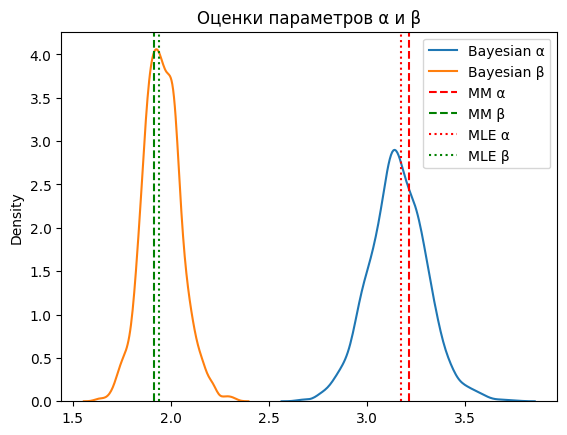

In [97]:
# Распределения оценок alpha и beta
sns.kdeplot(trace.posterior["alpha"].values.flatten(), label="Bayesian α")
sns.kdeplot(trace.posterior["beta"].values.flatten(), label="Bayesian β")
plt.axvline(alpha_mm, color='r', linestyle='--', label="MM α")
plt.axvline(beta_mm, color='g', linestyle='--', label="MM β")
plt.axvline(alpha_mle, color='r', linestyle=':', label="MLE α")
plt.axvline(beta_mle, color='g', linestyle=':', label="MLE β")
plt.legend()
plt.title("Оценки параметров α и β")

plt.show()